# Quiz game

## descriptive analysis

In [1]:
import pandas as pd # type: ignore
import os # type: ignore
import opendatasets as od # type: ignore
import numpy as np # type: ignore
import random # type: ignore
import time # type: ignore
import matplotlib # type: ignore
from matplotlib import pyplot as plt # type: ignore
from collections import Counter # type: ignore
import geopandas as gpd # type: ignore

In [2]:
game_set = pd.read_csv('./game_set.csv')

In [3]:
game_set

,name_surname,birth,first_profession,second_profession,third_profession,type,title,adult,start_year,minutes_runtimes,genre_1,genre_2,genre_3
0,Fred Astaire,1899,actor,miscellaneous,producer,movie,The Towering Inferno,0,1974,165,Action,Drama,Thriller
1,Lauren Bacall,1924,actress,soundtrack,archive_footage,movie,To Have and Have Not,0,1944,100,Adventure,Comedy,Film-Noir
2,Brigitte Bardot,1934,actress,music_department,producer,movie,Contempt,0,1963,102,Drama,Romance,NaN
3,John Belushi,1949,actor,writer,music_department,tv series,Saturday Night Live,0,1975,90,Comedy,Music,NaN
4,Ingmar Bergman,1918,writer,director,actor,movie,Wild Strawberries,0,1957,92,Drama,Romance,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1300473,Benjamin Dino,1996,actor,NaN,NaN,movie,Sunset,0,2018,142,Drama,History,NaN
1300474,Thomas Hou Mandsfeldt,1973,actor,producer,NaN,movie,Rose,0,2022,106,Comedy,Drama,NaN
1300475,Yuki Katayama,1996,actress,NaN,NaN,movie,Convenience Story,0,2022,97,Comedy,Fantasy,Romance
1300476,Pardeep Singh Sooch,1987,actor,NaN,NaN,movie,Don't Say Its Name,0,2021,84,Drama,Horror,Mystery


In [30]:
movies = game_set[game_set['type'] == 'movie']

np.max(movies['start_year'])

2026

In [31]:
np.min(movies['start_year'])

1894

In [32]:
tv_series = game_set[game_set['type'] == 'tv series']

np.max(tv_series['start_year'])

2026

In [34]:
tv_series = game_set[game_set['type'] == 'tv series']

np.min(tv_series['start_year'])

1930

In [38]:
np.min(game_set['birth'])

4

In [36]:
np.max(game_set['birth'])

2022

In [21]:
actors = game_set.loc[(game_set['first_profession'] == 'actor') | (game_set['first_profession'] == 'actress')]

birth = actors['birth'].to_numpy()
round(np.mean(birth))

1954

In [22]:
2024 - round(np.mean(birth))

70

In [5]:
minutes_runtimes = game_set['minutes_runtimes'].to_numpy()

In [6]:
total_minutes = np.sum(minutes_runtimes)
total_hours = round(np.divide(total_minutes, 60))
total_days = round(np.divide(total_hours, 24))
total_years = round(np.divide(total_days, 365))

print(f'the total number of minuter are {total_minutes}')
print(f'the total number of hours are {total_hours}')
print(f'the total number of days are {total_days}')
print(f'the total number of years are {total_years}')

the total number of minuter are 114538358
the total number of hours are 1908973
the total number of days are 79541
the total number of years are 218


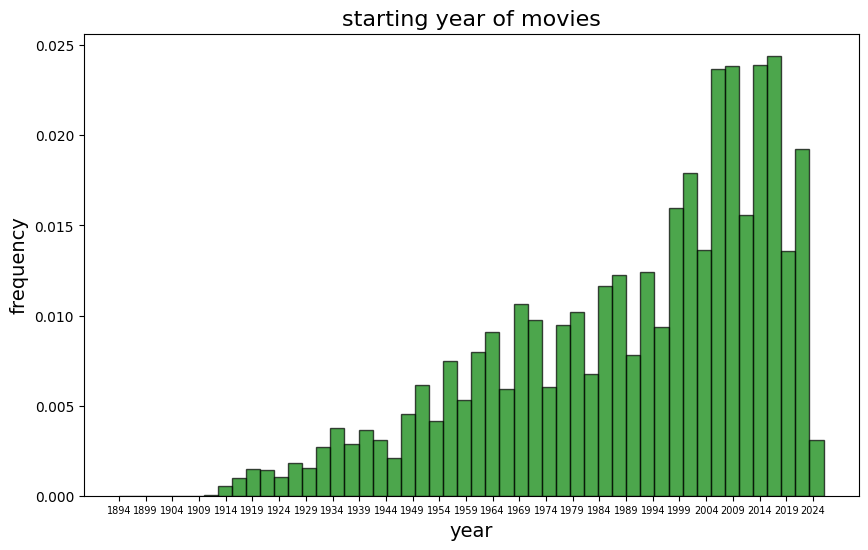

In [19]:
plt.figure(figsize=(10, 6))
plt.hist(game_set['start_year'], bins=50, color='green', alpha=0.7, edgecolor='black', density=True)
plt.title('starting year of movies', fontsize=16)
plt.xlabel('year', fontsize=14)
plt.ylabel('frequency', fontsize=14)
plt.xticks(np.arange(game_set['start_year'].min(), game_set['start_year'].max(), step=5), fontsize=7)
plt.grid(False)
plt.show()

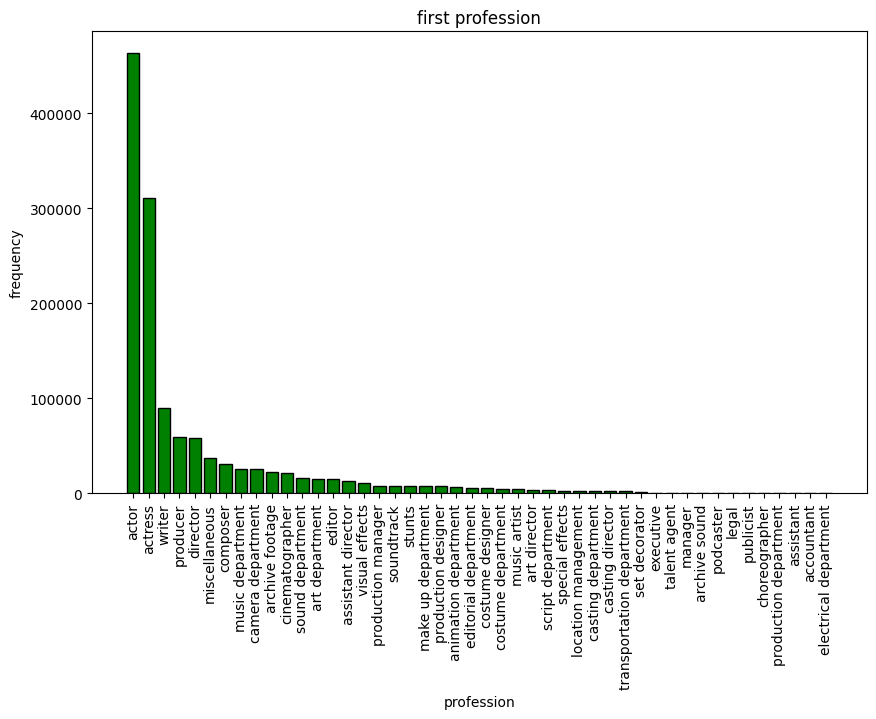

In [8]:
profession_counts = Counter(game_set['first_profession'])

categories = list(profession_counts.keys())
frequencies = list(profession_counts.values())

sorted_indices = sorted(range(len(frequencies)), key=lambda i: frequencies[i], reverse=True)
sorted_categories = [categories[i] for i in sorted_indices]
sorted_frequencies = [frequencies[i] for i in sorted_indices]

plt.figure(figsize=(10, 6))
plt.bar(sorted_categories, sorted_frequencies, color='green', edgecolor='black')  
plt.title('first profession')
plt.xlabel('profession')
plt.ylabel('frequency')
plt.xticks(rotation=90)
plt.show()

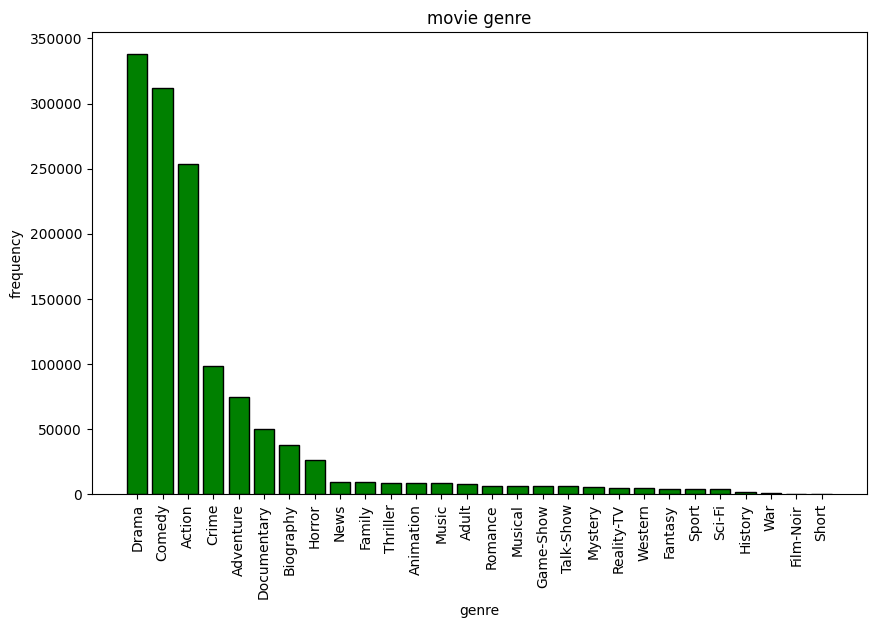

In [9]:
profession_counts = Counter(game_set['genre_1'])

categories = list(profession_counts.keys())
frequencies = list(profession_counts.values())

sorted_indices = sorted(range(len(frequencies)), key=lambda i: frequencies[i], reverse=True)
sorted_categories = [categories[i] for i in sorted_indices]
sorted_frequencies = [frequencies[i] for i in sorted_indices]

plt.figure(figsize=(10, 6))
plt.bar(sorted_categories, sorted_frequencies, color='green', edgecolor='black')  
plt.title('movie genre')
plt.xlabel('genre')
plt.ylabel('frequency')
plt.xticks(rotation=90)
plt.show()

In [10]:
merge_set = pd.read_csv('./merge_set.csv')

In [11]:
counries_counts = Counter(merge_set['region'].dropna(how='any'))

df = pd.DataFrame({'country': list(counries_counts.keys()), 'frequency': list(counries_counts.values())})

In [12]:
df['country'].unique()

array(['US', 'AR', 'MX', 'PE', 'VE', 'AT', 'DE', 'XWG', 'CA', 'AU', 'FR',
       'CSHH', 'SK', 'PT', 'IR', 'DK', 'ES', 'NO', 'BR', 'RO', 'TR', 'IT',
       'EE', 'FI', 'LT', 'TH', 'GR', 'HR', 'PL', 'EC', 'HU', 'CZ', 'SE',
       'JP', 'KR', 'BE', 'BG', 'GB', 'SUHH', 'RS', 'UA', 'TW', 'IL', 'IN',
       'NL', 'PH', 'XYU', 'SI', 'CN', 'XWW', 'UY', 'ZA', 'HK', 'EG', 'VN',
       'LV', 'ID', 'AE', 'SG', 'DDDE', 'RU', 'CL', 'KZ', 'AZ', 'UZ', 'CH',
       'NZ', 'CO', 'PA', 'IE', 'CM', 'BY', 'XEU', 'GE', 'IS', 'YUCS',
       'BF', 'BJ', 'AL', 'XKO', 'QA', 'BD', 'GT', 'MK', 'CU', 'BA', 'MD',
       'LU', 'CR', 'DO', 'AM', 'XAS', 'TN', 'DZ', 'PR', 'JM', 'MY', 'NG',
       'PK', 'CG', 'SV', 'LB', 'BO', 'PY', 'TM', 'MZ', 'TJ', 'ME', 'MA',
       'XSA', 'KG', 'CI', 'AF', 'AW', 'MN', 'GL', 'LK', 'NP', 'SY', 'TO',
       'KP', 'LI', 'SN', 'SA', 'IQ', 'PS', 'KH', 'GH', 'KW', 'CY', 'XPI',
       'MC', 'HT', 'CSXX', 'ML', 'YE', 'GI', 'UG', 'ZW', 'SR', 'GN', 'MO',
       'BS', 'MR', 'BT', 'TD', 'ZM', 'G

In [13]:
world_data = gpd.read_file("map/ne_110m_admin_0_countries.shp")

In [14]:
world_data['ISO_A2_EH'].unique()

array(['FJ', 'TZ', 'EH', 'CA', 'US', 'KZ', 'UZ', 'PG', 'ID', 'AR', 'CL',
       'CD', 'SO', 'KE', 'SD', 'TD', 'HT', 'DO', 'RU', 'BS', 'FK', 'NO',
       'GL', 'TF', 'TL', 'ZA', 'LS', 'MX', 'UY', 'BR', 'BO', 'PE', 'CO',
       'PA', 'CR', 'NI', 'HN', 'SV', 'GT', 'BZ', 'VE', 'GY', 'SR', 'FR',
       'EC', 'PR', 'JM', 'CU', 'ZW', 'BW', 'NA', 'SN', 'ML', 'MR', 'BJ',
       'NE', 'NG', 'CM', 'TG', 'GH', 'CI', 'GN', 'GW', 'LR', 'SL', 'BF',
       'CF', 'CG', 'GA', 'GQ', 'ZM', 'MW', 'MZ', 'SZ', 'AO', 'BI', 'IL',
       'LB', 'MG', 'PS', 'GM', 'TN', 'DZ', 'JO', 'AE', 'QA', 'KW', 'IQ',
       'OM', 'VU', 'KH', 'TH', 'LA', 'MM', 'VN', 'KP', 'KR', 'MN', 'IN',
       'BD', 'BT', 'NP', 'PK', 'AF', 'TJ', 'KG', 'TM', 'IR', 'SY', 'AM',
       'SE', 'BY', 'UA', 'PL', 'AT', 'HU', 'MD', 'RO', 'LT', 'LV', 'EE',
       'DE', 'BG', 'GR', 'TR', 'AL', 'HR', 'CH', 'LU', 'BE', 'NL', 'PT',
       'ES', 'IE', 'NC', 'SB', 'NZ', 'AU', 'LK', 'CN', 'TW', 'IT', 'DK',
       'GB', 'IS', 'AZ', 'GE', 'PH', 'MY', 'BN', 'S

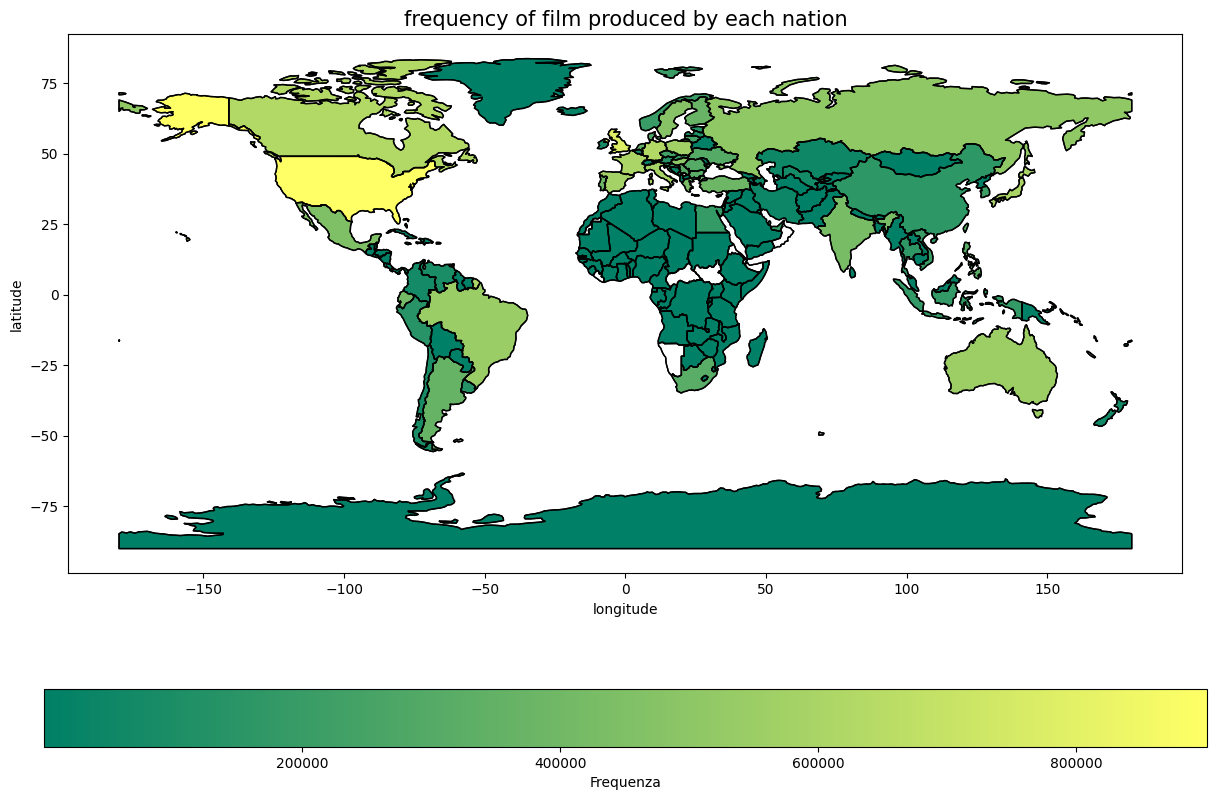

In [15]:
merged = world_data.set_index('ISO_A2_EH').join(df.set_index('country'), how='left')

fig, ax = plt.subplots(1, 1, figsize=(15, 10))

merged.boundary.plot(ax=ax, linewidth=1, color='black')  
merged.plot(column='frequency', ax=ax, legend=True,
            legend_kwds={'label': "Frequenza",
                         'orientation': "horizontal"},
            cmap='summer', edgecolor='black', missing_kwds={"color": "white"})

plt.title('frequency of film produced by each nation', fontsize=15)
plt.xlabel('longitude')
plt.ylabel('latitude')
plt.show()